In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
size_2 = (6,4)
size_3 = (3.08, 2.31)
plt.rcParams['figure.figsize'] = size_2
plt.rcParams['font.size'] = 24
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams['lines.markerfacecolor'] = 'none'
plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['xtick.major.pad'] = '7.5'
plt.rcParams['ytick.major.pad'] = '7.5'
plt.rcParams['axes.formatter.use_mathtext'] = True
try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
except:
    from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [3]:
def seir_decay_model(y,t,alpha,beta,kappa,gamma,Lambda,eta,xi,theta,N):
    S,P,E,I,Q,R,D = y
    if t < vaccine_date:
        alpha = 0
    dSdt = -beta*I*S/N-kappa*Q*S/N-alpha*S+ theta*(R+P)
    dPdt = alpha*S - theta*P
    dEdt = beta*I*S/N+kappa*Q*S/N-gamma*E
    dIdt = gamma*E-Lambda*I-eta*I
    dQdt = Lambda*I-eta*Q-xi*Q
    dRdt = eta*(Q+I)-theta*R
    dDdt = xi*(Q+I)
    return [dSdt,dPdt,dEdt,dIdt,dQdt,dRdt,dDdt]

In [4]:
#validation
alpha = 0 # vaccine rate
vaccine_date = 100 # start date of vaccine 
beta_covid = 0.5  # transmission rate of susceptible 
kappa_covid = beta_covid/10 # transmission rate of quanrantined individuals
gamma_covid = 0.1 # latent rate
Lambda_covid = 0.05 # quarantine ratio
eta_covid = 0.1 # recovery rate
xi_covid = 0.0001 # death rate
theta_covid = 1/180 # recovery decay

Lambda = np.linspace(0,0.9,10)
N = 1e6
I = 100
R = 0
E = 10
D = 0
Q = 0
P = 0
S = N-I-R-D-Q-P


In [30]:
data_save = []
New_cases = []
for index0,Lambda_used in enumerate(Lambda):
    initial_conditions_covid = [S,P,E,I,Q,R,D]
    t_length_covid = 1000
    t_covid = np.arange(1,t_length_covid+1,1)
    solution_covid = odeint(seir_decay_model, initial_conditions_covid, t_covid, args=(alpha,beta_covid,kappa_covid,gamma_covid,Lambda_used,eta_covid,xi_covid,theta_covid,N))
    temp = solution_covid.T
    data_save.append(temp)
    new_cases = temp[2]*gamma_covid
    New_cases.append(new_cases)
New_cases = np.array(New_cases)

In [8]:
data_save[0].shape

(7, 1000)

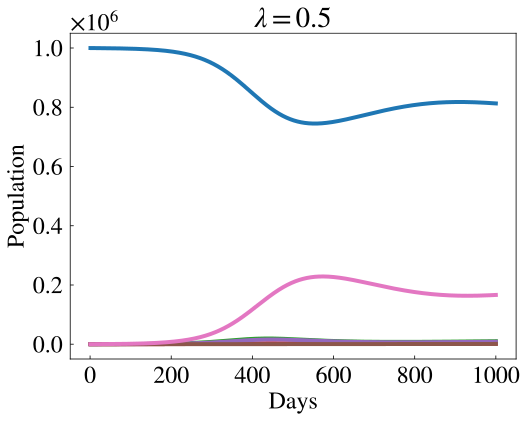

In [23]:
plt.figure(figsize=(8, 6))
linewidth = 4
Lambda_index = 5
plt.plot(t_covid, data_save[Lambda_index][0], label='Susceptible', color='C0',linewidth = linewidth)
# plt.plot(t_covid, P_covid, label='Protected', color='C1',linewidth = linewidth)
plt.plot(t_covid, data_save[Lambda_index][2], label='Infected', color='C2',linewidth = linewidth)
plt.plot(t_covid, data_save[Lambda_index][3], label='Exposed', color='C3',linewidth = linewidth)
plt.plot(t_covid, data_save[Lambda_index][4], label='Quarantine', color='C4',linewidth = linewidth)
plt.plot(t_covid, data_save[Lambda_index][6], label='Death', color='C5',linewidth = linewidth)

plt.plot(t_covid, data_save[Lambda_index][5], label='Recovered', color='C6',linewidth = linewidth)
plt.xlabel('Days')
plt.ylabel('Population')
# plt.title('Start date: 06/13/2020')
# plt.legend(ncol = 2,)
# plt.yscale('log')
plt.title(r'$\lambda = 0.5$')
# plt.grid()
# plt.show()
# plt.savefig('Comparison_lambda0.5.pdf')

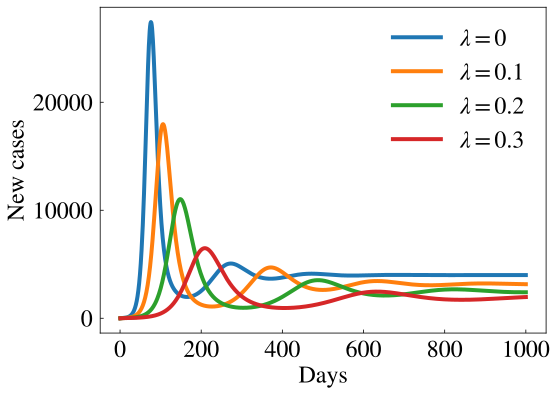

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(t_covid,New_cases[0],linewidth = linewidth,label = r'$\lambda = 0$')
plt.plot(t_covid,New_cases[1],linewidth = linewidth,label = r'$\lambda = 0.1$')
plt.plot(t_covid,New_cases[2],linewidth = linewidth,label = r'$\lambda = 0.2$')
plt.plot(t_covid,New_cases[3],linewidth = linewidth,label = r'$\lambda = 0.3$')
plt.xlabel('Days')
plt.ylabel('New cases')
# plt.title('Start date: 12/15/2021')
plt.legend()
# plt.savefig('Comparison_lambda_newcases.pdf')

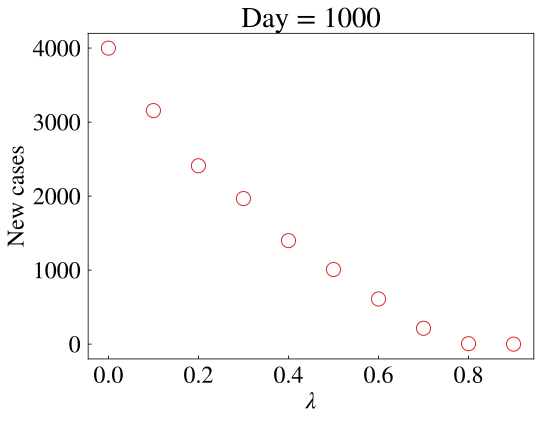

In [46]:
plt.figure(figsize=(8, 6))
# plt.scatter(Lambda,New_cases[:,300],color = 'none',edgecolors='C0',marker = '<',s = 200)
# plt.scatter(Lambda,New_cases[:,500],color = 'none',edgecolors='C1',marker = 's',s = 200)
# plt.scatter(Lambda,New_cases[:,800],color = 'none',edgecolors='C2',marker = '*',s = 200)
plt.scatter(Lambda,New_cases[:,999],color = 'none',edgecolors='C3',marker = 'o',s = 200)
plt.xlabel(r'$\lambda$')
plt.ylabel('New cases')
plt.title('Day = 1000')
# plt.savefig('Comparison_lambda_newcases_day1000.pdf')

In [29]:
Lambda_covid

0.05